In [9]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [10]:
# Fetch images count from folders

In [11]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [12]:
#Load Images into Arrays as Dataset

In [13]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [15]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [16]:
import matplotlib.pyplot as plt

In [17]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


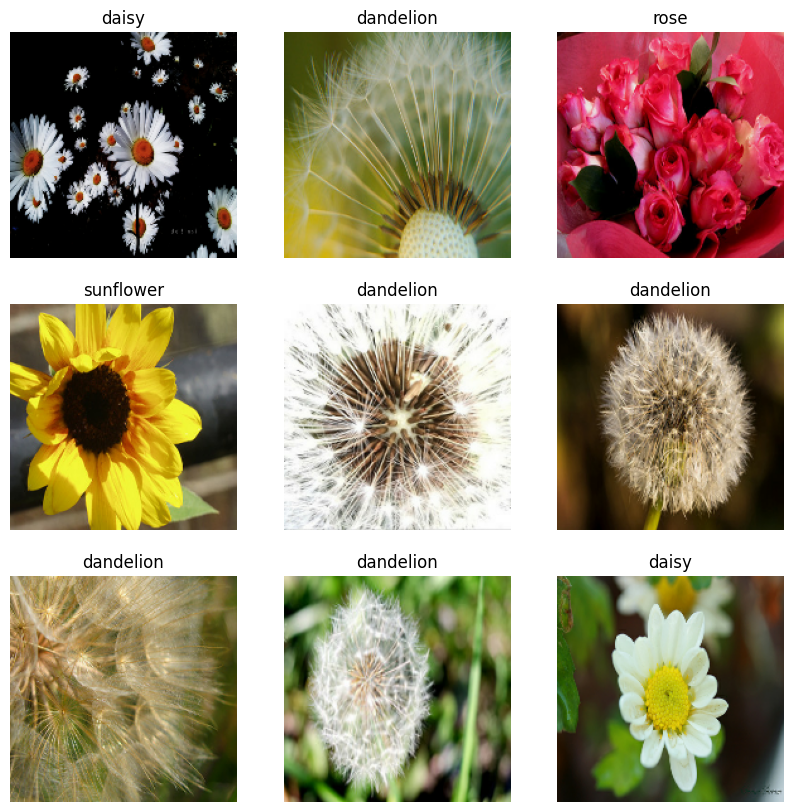

In [19]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [22]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation

In [29]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

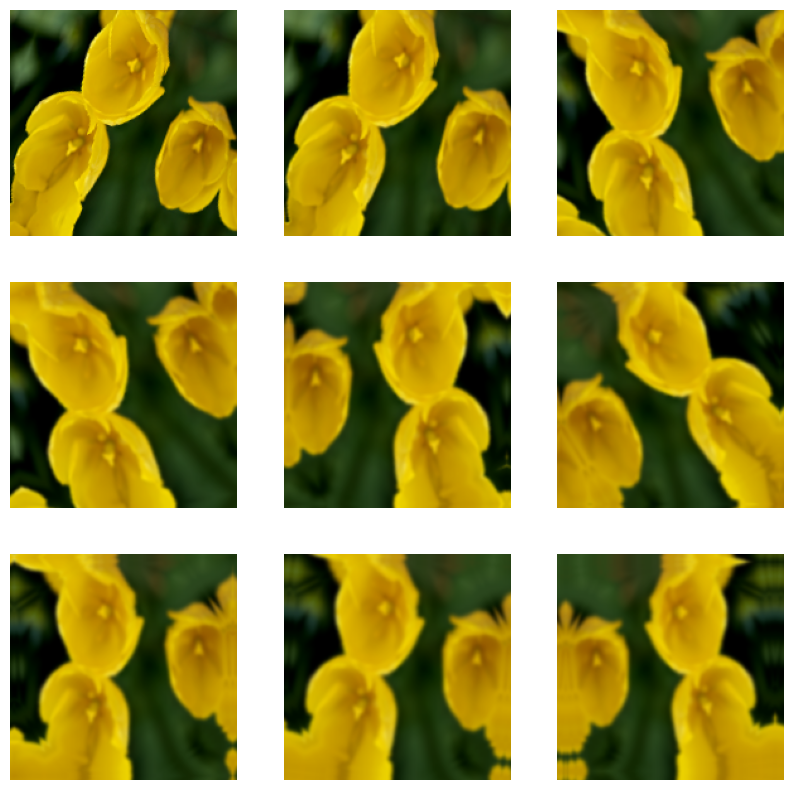

In [30]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
# Model Creation

In [31]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)     │ (None, 180, 180, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ rescaling (Rescaling)         │ (None, 180, 180, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d (Conv2D)               │ (None, 180, 180, 16)  │          448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 90, 90, 16)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 90, 90, 32)    │        4,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 45, 45, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 45, 45, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 22, 22, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 22, 22, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 30976)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    3,965,056 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 5)             │          645 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 287ms/step - accuracy: 0.4098 - loss: 1.4478 - val_accuracy: 0.5574 - val_loss: 1.0533
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 253ms/step - accuracy: 0.5952 - loss: 1.0254 - val_accuracy: 0.5655 - val_loss: 1.0807
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.6277 - loss: 0.9548 - val_accuracy: 0.6396 - val_loss: 0.9270
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 255ms/step - accuracy: 0.6684 - loss: 0.8373 - val_accuracy: 0.6396 - val_loss: 0.9312
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 258ms/step - accuracy: 0.6907 - loss: 0.8060 - val_accuracy: 0.6848 - val_loss: 0.8317
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 261ms/step - accuracy: 0.7194 - loss: 0.7390 - val_accuracy: 0.6802 - val_loss: 0.8307
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 261ms/step - accuracy: 0.7339 - loss: 0.7181 - val_accuracy: 0.6756 - val_loss: 0.8376
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 262ms/step - accuracy: 0.7324 - loss: 0

In [35]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [36]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


'The Image belongs to rose with a score of 83.70719'

In [37]:
model.save('Flower_Recog_Model.h5')